## Loading the libraries

In [2]:
import nltk
nltk.download()
nltk.download('wordnet')
nltk.download('stopwords')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet
      Unzipping corpora/wordnet.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
[nltk_data] Downloading package wordnet to /root/nltk_data...

True

In [3]:
import pandas as pd
import numpy as np
import string, os 
import scipy as sp
import sklearn
import sys
from nltk.corpus import stopwords
import nltk



!pip install gensim
!pip install markovify

import markovify
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle


from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 


from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(2)
seed(1)


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

  Running setup.py bdist_wheel for markovify ... - done
  Stored in directory: /root/.cache/pip/wheels/66/fe/5b/07257dd2401d9835447a0f0223f967c998c153404d32612253
Successfully built markovify


Using TensorFlow backend.


## Google Colab Authentication

In [4]:
! pip install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.4MB/s 
  Running setup.py bdist_wheel for pydrive ... - done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


## Downloading and reading the data

In [0]:
file_id = '11fppMBgXWADXE5JqJ373d5AecjY4AYhF'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('abcnews-date-text.csv')

In [0]:
df = pd.read_csv("abcnews-date-text.csv")

In [7]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Subsetting the data to 10,000 headlines

In [0]:
df_text = df[['headline_text']]
np.random.seed(1000);
df_text = df_text.iloc[np.random.choice(len(df_text), 10000)]

In [71]:
df_text

,headline_text
134848,abalone companies unite to boost sales
376059,watch kevin rudds honour guard
18782,govt accused of politicising parades
782888,abc business news and market analysis
5993,britain asks turkey for use of airspace
952668,analysis were environmental laws breached at p...
958683,dean nalder confronted by angry traders at bar...
953636,ko machine golovkin claims 33rd victim
793276,research helps doctors prescribe effective ant...
436719,hunter wine grape harvest begins


## Sneak Peek into the Polarity of the words

In [80]:
from textblob import TextBlob

senti=[]
df_text_eda = df_text[:]
df_text_eda = df_text_eda.reset_index(drop=True)

for i in range(10000):
    print(i)
    txt=df_text_eda.loc[i,'headline_text']
    data_formatted=TextBlob(txt.strip())
    #print(data_formatted)
    ##txt=data_formatted.loc[9,'headline_text']
    ##print(txt)   
    print(data_formatted)
    print(data_formatted.sentiment.polarity)
    if(data_formatted.sentiment.polarity==0):
        sentiment_for_sent='Neutral'
    elif(data_formatted.sentiment.polarity>0):
        sentiment_for_sent='positive'
    else:
        sentiment_for_sent='Negative'
    
    senti.append([txt,data_formatted.sentiment.polarity,sentiment_for_sent,data_formatted.sentiment.subjectivity])

0
abalone companies unite to boost sales
0.0
1
watch kevin rudds honour guard
0.0
2
govt accused of politicising parades
0.0
3
abc business news and market analysis
0.0
4
britain asks turkey for use of airspace
0.0
5
analysis were environmental laws breached at port melville
0.0
6
dean nalder confronted by angry traders at barrack
-0.5
7
ko machine golovkin claims 33rd victim
-0.07500000000000001
8
research helps doctors prescribe effective antibiotics
0.6
9
hunter wine grape harvest begins
0.0
10
austrian jumper soars to gold on olympic hill
0.0
11
great alpine rd planning moves ahead
0.8
12
baby murder suspect misses court
0.0
13
game on for video game history exhibit
-0.4
14
aftershocks possible after goldfields quake
0.0
15
a league grand final great rivals face off in dream decider
0.43333333333333335
16
ahok labelled the son of satan by cleric
0.0
17
nsw parks service defends delay of brindabella
0.0
18
roosters hold off panthers
0.0
19
council concern over huntlee infrastructure

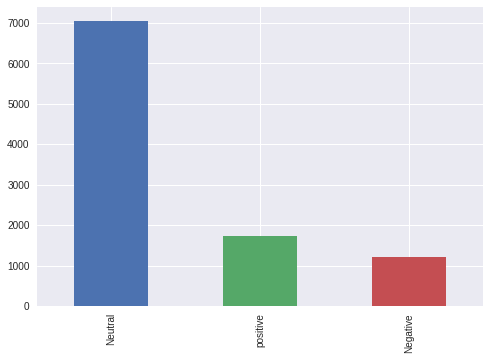

In [81]:
senti=pd.DataFrame(senti)
senti.columns=['Headline','Polarity','Sentiment','subjectivity']
senti['Sentiment'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ebe72dd8>]],
      dtype=object)

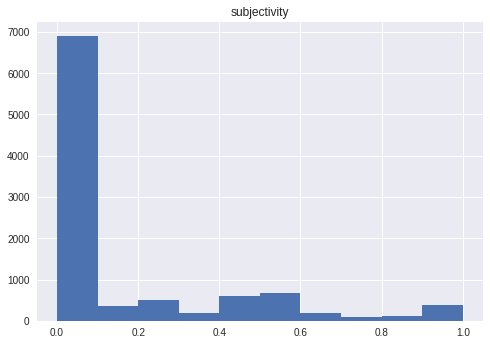

In [83]:
senti.hist(column="subjectivity")

## Removing stop words

In [0]:
df_text1 = df_text[:]

df_text1 = df_text1.astype('str')

for i in range(len(df_text1)):
    
   
    df_text1.iloc[i]['headline_text'] = [k for k in df_text1.iloc[i]['headline_text'].split(' ') if k not in stopwords.words()]

## Lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

for i in range(len(df_text1)):
  df_text1.iloc[i]['headline_text'] = [wordnet_lemmatizer.lemmatize(k) for k in df_text1.iloc[i]['headline_text']]


## Dumping the data into a pickle file for future use

In [0]:
pickle.dump(df_text1, open('data_text.dat', 'wb'))

## Getting the headlines data alone

In [0]:
train_data = [tt[0] for tt in df_text1.iloc[0:].values]

## Number of Clusters

In [0]:
num_topics = 10

## LDA

In [0]:
ss = gensim.corpora.Dictionary(train_data)
corpus = [ss.doc2bow(i) for i in train_data]
lda = ldamodel.LdaModel(corpus=corpus, id2word=ss, num_topics=num_topics)

## A simple word cloud to understand the headlines

In [0]:
def clean_text(ss):
    ss = "".join(i for i in ss if i not in string.punctuation).lower()
    ss = ss.encode("utf8").decode("ascii",'ignore')
    return ss 

In [19]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
stopwords=set(STOPWORDS)
def show_wordcloud(data,title=None):
    wc=WordCloud(background_color="black", max_words=10000,stopwords=STOPWORDS, max_font_size= 40)
    wc.generate(" ".join(data))
    fig=fig = plt.figure(figsize=[8,5], dpi=80)
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=16)
        fig.subplots_adjust(top=1)
        plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=1,interpolation='bilinear')
        plt.show()

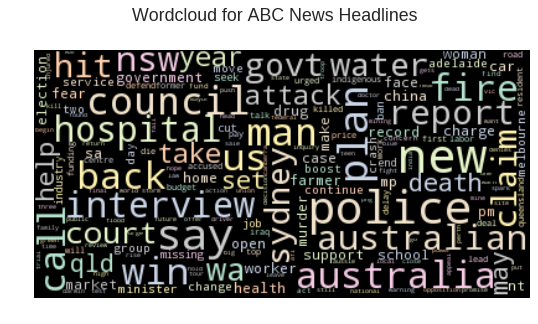

In [20]:
corpus = [clean_text(i) for i in df_text['headline_text']]
show_wordcloud(corpus,title="Wordcloud for ABC News Headlines")

## Generating LDA topics

In [0]:
def get_lda_topics(model, num):
    word_dict = {};
    for i in range(num):
        words = model.show_topic(i, topn = 20)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

In [0]:
lda = get_lda_topics(lda, num_topics)

In [23]:
lda

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,interview,new,police,claim,nsw,police,accused,rural,hospital,win
1,adelaide,back,crash,first,industry,child,coast,new,light,worker
2,driver,liberal,new,urged,country,u,gold,qld,police,say
3,year,national,open,price,hope,charged,call,police,green,student
4,big,lead,qld,cut,school,back,death,case,service,get
5,final,delay,injured,miner,water,air,support,law,warns,sydney
6,south,ahead,canberra,near,mining,murder,blast,fatal,rail,council
7,perth,election,north,water,talk,fear,local,u,call,security
8,truck,clash,body,highway,attack,two,govt,fire,run,tiger
9,charge,promise,report,govt,high,woman,target,shooting,png,hold


In [0]:
lda1 = pd.DataFrame(lda)

## NMF

### Converting arrays to string inputs

In [0]:
train_data1 = [' '.join(i) for i in train_data]

### Creating a design matrix

In [0]:
v = CountVectorizer(analyzer='word', max_features=5000)
counts_v = v.fit_transform(train_data1)

### Tf-Idf transformation

In [0]:
t = TfidfTransformer(smooth_idf=False)
tfidf = t.fit_transform(counts_v)

### Normalizing the Tf-Idf values

In [0]:
tfidf_normalized = normalize(tfidf, norm='l1', axis=1)

### NMF Model

In [31]:
model = NMF(n_components=num_topics, init='nndsvd')
model.fit(tfidf_normalized)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=10, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

### Generating NMF Topics

In [0]:
def get_nmf_topics(model, words):
    
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        
        ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[k] for k in ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    
    return pd.DataFrame(word_dict)

In [34]:
nmf = get_nmf_topics(model, 20)
nmf

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,interview,police,rural,new,abc,fire,charged,closer,council,sydney
1,chris,probe,news,australian,sport,house,murder,pm1,water,crash
2,nick,missing,national,govt,weather,nsw,court,move,plan,car
3,james,search,qld,say,entertainment,lead,child,step,back,hospital
4,john,body,podcast,call,news,destroys,death,one,considers,woman
5,michael,arrest,nsw,open,business,threat,accused,blood,urged,killed
6,extended,investigate,reporter,market,market,firefighter,woman,test,get,road
7,david,hunt,market,australia,analysis,contained,charge,researcher,restriction,fatal
8,lance,pursuit,vic,win,talk,western,drug,land,resident,plane
9,matt,robbery,tasmania,year,80,recovery,trial,govt,public,hit


In [0]:
nmf1 = pd.DataFrame(nmf)

## Markov Chain Model

In [0]:
df_text2 = df_text[:]
mcm_model1 = markovify.NewlineText(df_text2['headline_text'], state_size = 2)


### Autogenerated headlines

In [39]:
for i in range(10):
    print(mcm_model1.make_sentence())

wagga residents urged to help recovery
indigenous australians be recognised in queens honours
scientists teach computers how to shoot a night parrot
alleged robber found in darwin
goldfields residents warned about travelling
bangladeshi writer unconscious in hospital after bonfire explosion
police reveal images of servo hold up gold coast factory fire contained
moma reopens after crash
owen ruled out of gas
tas govt accused of involvement in businessmans


### Ensembling different markov models

In [40]:
mcm_model1 = markovify.Text(df_text2['headline_text'], state_size = 2)
mcm_model2 = markovify.Text(df_text2['headline_text'], state_size = 2)
mcm_model3 = markovify.Text(df_text2['headline_text'], state_size = 2)
model_combo = markovify.combine([ mcm_model1, mcm_model2, mcm_model3 ], [ 1.5, 1.5, 1 ])

for i in range(5):
    print(model_combo.make_sentence())

mnuchins wife louise linton apologises for made up interviews
australia needs to pay 130k for licence breaches
roo plane incident sparks call for real estate agents to understand
nab trader jailed for party killing
colombians intensify search for cycle crash driver


### Trying Markov Chain Models with POS Tagging

In [41]:
import re
!pip install spacy
import spacy

    100% |████████████████████████████████| 13.9MB 3.2MB/s 
    100% |████████████████████████████████| 317kB 24.3MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: msgpack 0.6.0
    Uninstalling msgpack-0.6.0:
      Successfully uninstalled msgpack-0.6.0


In [42]:
!python -m spacy download en_core_web_lg

    100% |████████████████████████████████| 852.3MB 63.5MB/s 
  Running setup.py install for en-core-web-lg ... - \ | / - \ | / - done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
nlp = spacy.load('en_core_web_lg')

class POSifiedText(markovify.Text):
    def word_split(self, sentence):
        return ["::".join((i.orth_, i.pos_)) for i in nlp(sentence)]

    def word_join(self, words):
        sentence = " ".join(i.split("::")[0] for i in words)
        return sentence

In [75]:
mcm_model_pos = POSifiedText(df_text2['headline_text'], state_size = 2)

for i in range(5):
    print(mcm_model_pos.make_sentence())

footage of indigenous peoples
urgent action needed to top mariners
investigation into diesel spill at port melville
govt urged to help move chiltern patients
government secures site for waste dump


### Computing similarity between the topics generated by LDA and NMF

In [59]:
for i in range(10):
  print("##########################")
  print("Topic {} in LDA".format(i+1))
  for j in range(10):
    tt = lda1.iloc[:,i]
    tt1 = nmf1.iloc[:,j]
    sentence1 = " ".join(k for k in tt)
    sentence2 = " ".join(k for k in tt1)
    tokens1 = nlp(sentence1)
    tokens2 = nlp(sentence2)
    sim_values = []
    dist_values = []
    for token1 in tokens1:
      for token2 in tokens2:
          #print(token1, token2, token1.similarity(token2))
          sim_values.append(token1.similarity(token2))
          t1 = token1.vector
          t2 = token2.vector
          dist = np.sqrt(np.sum((t1-t2)**2))
          dist_values.append(dist)
    print("Topic {} in NMF".format(j+1))
    #print("/n")
    print("Word mover distance is {}".format(np.mean(dist_values)))

##########################
Topic 1 in LDA
Topic 1 in NMF
Word mover distance is 8.142337799072266
Topic 2 in NMF
Word mover distance is 8.089372634887695
Topic 3 in NMF
Word mover distance is 8.092398643493652
Topic 4 in NMF
Word mover distance is 7.667988300323486
Topic 5 in NMF
Word mover distance is 7.994045257568359
Topic 6 in NMF
Word mover distance is 8.183316230773926
Topic 7 in NMF
Word mover distance is 8.256086349487305
Topic 8 in NMF
Word mover distance is 8.291165351867676
Topic 9 in NMF
Word mover distance is 7.659640312194824
Topic 10 in NMF
Word mover distance is 8.060943603515625
##########################
Topic 2 in LDA
Topic 1 in NMF
Word mover distance is 8.34648323059082
Topic 2 in NMF
Word mover distance is 8.030421257019043
Topic 3 in NMF
Word mover distance is 8.044584274291992
Topic 4 in NMF
Word mover distance is 7.568990707397461
Topic 5 in NMF
Word mover distance is 7.951457500457764
Topic 6 in NMF
Word mover distance is 8.079920768737793
Topic 7 in NMF
Word 

## LSTM

### Cleaning the text

In [60]:
corpus = [clean_text(i) for i in df_text['headline_text']]
corpus[:10]

['abalone companies unite to boost sales',
 'watch kevin rudds honour guard',
 'govt accused of politicising parades',
 'abc business news and market analysis',
 'britain asks turkey for use of airspace',
 'analysis were environmental laws breached at port melville',
 'dean nalder confronted by angry traders at barrack',
 'ko machine golovkin claims 33rd victim',
 'research helps doctors prescribe effective antibiotics',
 'hunter wine grape harvest begins']

### N-Gram Generator

In [62]:
tt = Tokenizer()

def get_sequence_of_tokens(corpus):
  
    tt.fit_on_texts(corpus)
    words = len(tt.word_index) + 1
 
    seq = []
    for i in corpus:
        token_list = tt.texts_to_sequences([i])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            seq.append(n_gram_sequence)
    return seq, words

inp, words = get_sequence_of_tokens(corpus)
inp[:10]

[[1594, 1261],
 [1594, 1261, 4112],
 [1594, 1261, 4112, 1],
 [1594, 1261, 4112, 1, 140],
 [1594, 1261, 4112, 1, 140, 442],
 [486, 1401],
 [486, 1401, 2533],
 [486, 1401, 2533, 1018],
 [486, 1401, 2533, 1018, 1595],
 [20, 75]]

### Creating predictor and label for the LSTM Model

In [0]:
def sentences(inp_seq):
    max_len = max([len(x) for x in inp_seq])
    inp_seq = np.array(pad_sequences(inp_seq, maxlen=max_len, padding='pre'))
    
    predictors, label = inp_seq[:,:-1],inp_seq[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_len

predictors, label, max_len = sentences(inp)

### Model with 3 layers with 100 units in LSTM

In [66]:
def create_model(max_len, words):
    input_len = max_len - 1
    model = Sequential()
    
    
    model.add(Embedding(words, 10, input_length=input_len))
    
   
    model.add(LSTM(100))
    
   
    model.add(Dense(words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_len, words)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 12, 10)            125270    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dense_1 (Dense)              (None, 12527)             1265227   
Total params: 1,434,897
Trainable params: 1,434,897
Non-trainable params: 0
_________________________________________________________________


### Running the model for 50 epochs

In [67]:
model.fit(predictors, label, epochs=50, verbose=2)

Epoch 1/50
 - 64s - loss: 8.3042
Epoch 2/50
 - 62s - loss: 7.8155
Epoch 3/50
 - 62s - loss: 7.6224
Epoch 4/50
 - 61s - loss: 7.4306
Epoch 5/50
 - 61s - loss: 7.2109
Epoch 6/50
 - 62s - loss: 6.9710
Epoch 7/50
 - 62s - loss: 6.7306
Epoch 8/50
 - 62s - loss: 6.4924
Epoch 9/50
 - 62s - loss: 6.2605
Epoch 10/50
 - 63s - loss: 6.0401
Epoch 11/50
 - 63s - loss: 5.8313
Epoch 12/50
 - 63s - loss: 5.6308
Epoch 13/50
 - 62s - loss: 5.4385
Epoch 14/50
 - 62s - loss: 5.2537
Epoch 15/50
 - 63s - loss: 5.0762
Epoch 16/50
 - 63s - loss: 4.9059
Epoch 17/50
 - 63s - loss: 4.7429
Epoch 18/50
 - 62s - loss: 4.5860
Epoch 19/50
 - 63s - loss: 4.4365
Epoch 20/50
 - 63s - loss: 4.2932
Epoch 21/50
 - 63s - loss: 4.1544
Epoch 22/50
 - 63s - loss: 4.0249
Epoch 23/50
 - 63s - loss: 3.8990
Epoch 24/50
 - 63s - loss: 3.7803
Epoch 25/50
 - 63s - loss: 3.6679
Epoch 26/50
 - 63s - loss: 3.5593
Epoch 27/50
 - 63s - loss: 3.4553
Epoch 28/50
 - 63s - loss: 3.3573
Epoch 29/50
 - 63s - loss: 3.2609
Epoch 30/50
 - 63s - lo

### Function to generate headlines based on the user input

In [0]:
def headline_generator(text, next_words, model, max_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " "+output_word
    return text.title()

### Examples of generated headlines based on user input

In [69]:
print (headline_generator("weather", 5, model, max_len))
print (headline_generator("police", 4, model, max_len))
print (headline_generator("interview", 4, model, max_len))
print (headline_generator("soccer", 4, model, max_len))
print (headline_generator("sports", 4, model, max_len))
print (headline_generator("science and technology", 5, model, max_len))
print (headline_generator("health", 5, model, max_len))

Weather Opens Out To Crush Demons
Police Probe Child Abduction After
Interview John Cartwright Discusses Pac
Soccer Claim Work Roosters Cricket
Sports Minister Blasts Irrelevant Ama
Science And Technology Could Go Fta Kids Fears
Health Service Counts Health Bill Training


In [76]:
print (headline_generator("cricket", 5, model, max_len))

Cricket Qld Podcast 240615 Developments For


In [78]:
print (headline_generator("John Cartwright", 5, model, max_len))

John Cartwright Of Anzac Day Family From


In [79]:
print (headline_generator("Health Bill", 5, model, max_len))

Health Bill Stosurs Us Claims Winner One


## References
    https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df 
    https://www.kaggle.com/nulldata/meaningful-random-headlines-by-markov-chain/notebook
    https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms/data
    http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 
    https://www.kaggle.com/hiteshp/what-is-with-news-headlines
    https://github.com/jsvine/markovify
    https://medium.com/@rahulvaish/textblob-and-sentiment-analysis-python-a687e9fabe96